In [9]:
import numpy as np
from __future__ import division
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [10]:
our_images = scipy.io.loadmat('IMAGES_RAW.mat')
images = our_images['IMAGESr']

In [11]:
def random_patch(library, width):
    im = library[:,:,np.random.randint(10)]
    x = np.random.randint(np.shape(im)[0] - width)
    y = np.random.randint(np.shape(im)[1] - width)
    patch = im[x:x+width,y:y+width]
    return patch

In [12]:
def make_batch(library, num, width):
    I = np.zeros((num, width*width))
    count = 0
    while count < num:
        im = random_patch(library, width)
        im_vec = im.reshape(1, width*width)
        I[count] = im_vec
        count = count + 1
    return I

In [5]:
mean = np.zeros((256,))

In [55]:
pics = make_batch(images, 100000, 16)

In [7]:
for i in range(99999):
    mean = mean + pics[i] 
mean = mean/100000

In [56]:
pics[1]

array([ 0.55056783,  0.50171014,  0.54228803,  0.55056783,  0.52570268,
        0.49386808,  0.44736596,  0.44736596,  0.5097725 ,  0.49386808,
        0.53421232,  0.53421232,  0.49386808,  0.54228803,  0.48567697,
        0.48567697,  0.52570268,  0.54228803,  0.55975744,  0.52570268,
        0.51693555,  0.47751447,  0.47054788,  0.51693555,  0.48567697,
        0.47751447,  0.54228803,  0.47751447,  0.49386808,  0.43265077,
        0.51693555,  0.50171014,  0.55975744,  0.5097725 ,  0.48567697,
        0.50171014,  0.48567697,  0.55975744,  0.49386808,  0.44736596,
        0.47054788,  0.50171014,  0.5097725 ,  0.47054788,  0.49386808,
        0.43958493,  0.55975744,  0.48567697,  0.48567697,  0.53421232,
        0.48567697,  0.50171014,  0.52570268,  0.44736596,  0.55056783,
        0.47054788,  0.47054788,  0.5097725 ,  0.50171014,  0.46226045,
        0.50171014,  0.42485448,  0.44736596,  0.5097725 ,  0.5097725 ,
        0.45498868,  0.51693555,  0.50171014,  0.47751447,  0.47

In [9]:
sample = np.random.multivariate_normal(mean, cov) 

In [45]:
np.shape(sample)

(256,)

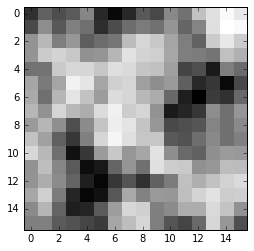

In [40]:
plt.imshow(sample.reshape(16,16),cmap=plt.cm.Greys_r, interpolation = 'nearest')

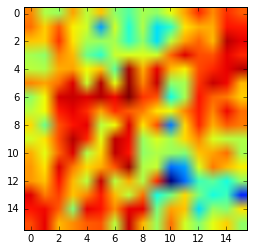

In [41]:
plt.imshow(pics[1].reshape(16,16))

In [15]:
np.random.rand(4,4)

array([[ 0.98953243,  0.61092655,  0.11892743,  0.89997376],
       [ 0.91064661,  0.55317708,  0.18899856,  0.01798148],
       [ 0.61553946,  0.40622703,  0.09585408,  0.38621294],
       [ 0.77501304,  0.14141679,  0.83699846,  0.41867764]])

In [16]:
empty = np.zeros((4,4))
empty[0:2,0:2] = np.random.rand(2,2)
empty

array([[ 0.59468644,  0.1402597 ,  0.        ,  0.        ],
       [ 0.02012003,  0.05764616,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [10]:
def make_grid(batch):
    n = 0
    empty = np.zeros((200,200))
    for j in np.linspace(0,170,11):
        for i in np.linspace(0,170,11):
                empty[i:i+16,j:j+16] = batch[n].reshape(16,16)
                n = n + 1
    return empty

/Users/alialsetri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


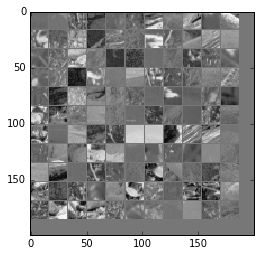

In [12]:
plt.imshow(make_grid(pics), cmap=plt.cm.Greys_r, interpolation = 'nearest')

In [44]:
np.shape(pics)

(100000, 256)

In [15]:
def lotta_samples(mean, cov):
    sample_matrix = np.zeros((1000, 256))
    for i in range(1000):
        sample_matrix[i,:] = np.random.multivariate_normal(mean, cov) 
    return sample_matrix

In [16]:
samples = lotta_samples(mean, cov)

In [52]:
np.shape(samples)

(100000, 256)

/Users/alialsetri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


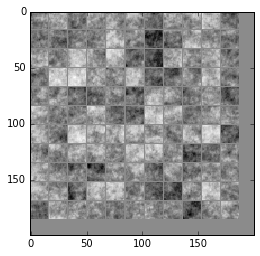

In [17]:
plt.imshow(make_grid(samples), cmap=plt.cm.Greys_r, interpolation = 'nearest')

In [3]:
x = np.array([1,2,3,4])
x

array([1, 2, 3, 4])

In [4]:
def f(x):
    return x*x

In [202]:
X = make_batch(images, 100, 16)
X = np.transpose(X)
T = np.shape(X)[1]
n = np.shape(X)[0]
J = np.random.randn(256,256)
H = np.random.randn(256)
def f(x):
    return x*x*x
def df(x):
    return 3*x*x
def ddf(x):
    return 6*x

In [66]:
def ScoreFunction(J,H,X):
    summand = 0
    for t in range(100):
        for k in range(256):
            one = -2*(np.dot(J[k],f(X[t,:])))*ddf(X[t,k]) - H[k]*ddf(X[t,k]) - 2*J[k,k]*((df(X[t,k]))*(df(X[t,k])))
            two = df(X[t,k])*(-2*np.dot(J[k],f(X[t])) - H[k])
            summand = summand + one + 0.5*two*two
    return summand

In [204]:
D = tf.placeholder(tf.float32)
T = tf.placeholder(tf.float32)
tee = tf.placeholder(tf.int32)
H = tf.Variable(tf.zeros([256,100]))
Jd = tf.Variable(tf.random_normal([n]))
Je = tf.exp(Jd)
J = tf.diag(Je)

In [140]:
score = (1/T)*(-2*tf.multiply(ddf(D),tf.matmul(J,f(D))) - tf.multiply(H,ddf(D)) 
  -2*tf.multiply(tf.transpose(tf.reshape(tf.tile(tf.diag_part(J),[tee]),[n,T])), tf.square(df(D))) + 
    2*tf.multiply(df(D), tf.square(tf.matmul(J,f(D)))) + 2*tf.multiply(tf.square(df(D)),tf.multiply(H,tf.matmul(J,f(D))))
               + (1/2)*tf.multiply(tf.square(df(D)), tf.square(H)))

TypeError: Value passed to parameter 'multiples' has DataType float32 not in list of allowed values: int32, int64

In [ ]:
tf.transpose(tf.reshape(tf.tile(tf.diag_part(J),tee),[n,T]))

In [205]:
score = (1/T)*(-2*tf.reduce_sum(tf.multiply(ddf(D),tf.matmul(J,f(D)))) - tf.reduce_sum(tf.multiply(H,ddf(D)))
-2*tf.reduce_sum(tf.multiply(tf.reshape(tf.tile(tf.diag_part(J),[tee]),[n,tee]), tf.square(df(D)))) 
+ 2*tf.reduce_sum(tf.multiply(df(D), tf.square(tf.matmul(J,f(D))))) + 
               2*tf.reduce_sum(tf.multiply(tf.square(df(D)),tf.multiply(H,tf.matmul(J,f(D)))))
            + (1/2)*tf.reduce_sum(tf.multiply(tf.square(df(D)), tf.square(H)))) 

In [206]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [207]:
print(sess.run(score, {T:100, D : X, tee : 100}))

7.80146e+06


In [208]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(score)

In [182]:
print(sess.run(Jd))

[-0.83333743 -1.88370275 -0.59839875 -0.26361668 -0.99505514 -0.68951678
  1.04891908 -0.136574   -0.65993816 -0.24052711  0.48902497 -1.75279462
  0.43181422 -1.10201073 -0.91733682  1.89513028 -0.71662074  2.28492856
 -0.30812371 -0.28304303  0.63605577 -1.56785214  0.90155733  0.22530457
  0.07205477  1.04183245  0.24944091  0.05987897  1.36792552  0.32684779
  0.31718597  0.54578656  1.53452086 -0.61181104  0.25485361  1.48351669
  1.1083802  -0.37494531 -0.08720951  1.18637979  1.43094897 -0.4825564
 -0.52229446  1.13341475  1.02329004 -0.89940655 -1.22834301  0.73043215
  1.27635574  0.80745065  0.58159685  0.29338109  0.8642742  -0.47967771
 -1.70026445 -0.57618165  0.61065912  1.4137975  -0.36980793 -0.36542368
 -1.39324605  0.91434026 -0.62649542  0.17058864 -0.5253191  -0.39417619
  0.59590286 -1.19234478 -0.33783999  0.54215956  0.60345024  0.20996708
 -0.33320278 -0.60841078  0.62318617 -0.01087089  0.19960248  1.71570528
 -1.14021003  0.2338336   1.72506237  0.36230654  0.

In [209]:
for i in range(1000):
    sess.run(train, {T:100, D : X, tee : 100})

In [210]:
print(sess.run(score, {T:100, D : X, tee : 100}))

4.32611e+28
